In [2]:
library(tidyverse)
library(gghighlight)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## read in the individual replicate data from 6base

In [3]:
setwd("/data/hodges_lab/6L_seq/data")

modC_8dayA<- read_tsv("8-day-A_6L_seq_proportion_posstrand.bed", 
                          col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                        "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total)
modC_8dayB<- read_tsv("8-day-B_6L_seq_proportion_posstrand.bed", 
                      col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                    "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total)  

modC_4dayA<- read_tsv("4-day-A_6L_seq_proportion_posstrand.bed", 
                      col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                    "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total)
modC_4dayB<- read_tsv("4-day-B_6L_seq_proportion_posstrand.bed", 
                      col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                    "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total) 

modC_0dayA<- read_tsv("0hr-A_6L_seq_proportion_posstrand.bed", 
                      col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                    "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total)
modC_0dayB<- read_tsv("0hr-B_6L_seq_proportion_posstrand.bed", 
                      col_names = c("chr", "start", "end", "strand", "num_mC", "num_hmC", "num_C", "context", 
                                    "tri_context", "num_total")) %>% 
            mutate(p_hmC = num_hmC/num_total, p_mC = num_mC/num_total, p_unmodC = (num_C)/num_total) 


Rows: 29294654 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chr, strand, context, tri_context
dbl (6): start, end, num_mC, num_hmC, num_C, num_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29294654 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chr, strand, context, tri_context
dbl (6): start, end, num_mC, num_hmC, num_C, num_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29294654 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chr, strand, context, tri_context
dbl (6): start, end, num_mC, num_hmC, num_C, num_total

ℹ Use `spec()` to retri

## combine the two biological replicates and set a read threshold of 10 across two replicates

In [4]:
modC_0day<- inner_join(modC_0dayA, modC_0dayB, by= c("chr", "start", "end")) %>% 
            select("chr", "start", "end", "p_hmCA"="p_hmC.x", "p_mCA"="p_mC.x","p_unmodCA"="p_unmodC.x", 
                   "p_hmCB"="p_hmC.y", "p_mCB"="p_mC.y", "p_unmodCB"="p_unmodC.y", "num_total.x", "num_total.y")%>% 
            mutate(avg_phmC = (p_hmCA+p_hmCB)/2, avg_pmC = (p_mCA+p_mCB)/2, avg_punmodC = (p_unmodCA+p_unmodCB)/2, cov = num_total.x+num_total.y)%>%
    filter(cov >= 10, chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22") %>%drop_na()
modC_4day<- inner_join(modC_4dayA, modC_4dayB, by= c("chr", "start", "end")) %>% 
            select("chr", "start", "end", "p_hmCA"="p_hmC.x", "p_mCA"="p_mC.x","p_unmodCA"="p_unmodC.x", 
                   "p_hmCB"="p_hmC.y", "p_mCB"="p_mC.y", "p_unmodCB"="p_unmodC.y", "num_total.x", "num_total.y")%>% 
            mutate(avg_phmC = (p_hmCA+p_hmCB)/2, avg_pmC = (p_mCA+p_mCB)/2, avg_punmodC = (p_unmodCA+p_unmodCB)/2, cov = num_total.x+num_total.y)%>%
    filter(cov >= 10, chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22")%>%drop_na()
modC_8day<- inner_join(modC_8dayA, modC_8dayB, by= c("chr", "start", "end")) %>% 
            select("chr", "start", "end", "p_hmCA"="p_hmC.x", "p_mCA"="p_mC.x","p_unmodCA"="p_unmodC.x", 
                   "p_hmCB"="p_hmC.y", "p_mCB"="p_mC.y", "p_unmodCB"="p_unmodC.y", "num_total.x", "num_total.y")%>% 
            mutate(avg_phmC = (p_hmCA+p_hmCB)/2, avg_pmC = (p_mCA+p_mCB)/2, avg_punmodC = (p_unmodCA+p_unmodCB)/2, cov = num_total.x+num_total.y)%>%
    filter(cov >= 10, chr == "chr1"| chr == "chr2"|chr == "chr3"|chr == "chr4"|chr == "chr5"| chr == "chr6"| chr == "chr7"| chr == "chr8"| chr == "chr9"|
          chr == "chr10"|chr == "chr11"|chr == "chr12"|chr == "chr13"|chr == "chr14"|chr == "chr15"|chr == "chr16"|chr == "chr17"|chr == "chr18"|
          chr == "chr19"|chr == "chr20"|chr == "chr21"|chr == "chr22")%>%drop_na()
nrow(modC_0day)
nrow(modC_4day)
nrow(modC_8day)

write_tsv(modC_0day, file = "/data/hodges_lab/6L_seq/data/day0_repavg_6base.bed")
write_tsv(modC_4day, file = "/data/hodges_lab/6L_seq/data/day4_repavg_6base.bed")
write_tsv(modC_8day, file = "/data/hodges_lab/6L_seq/data/day8_repavg_6base.bed")

## Intersect filtered 6-base data with ATAC-Me called regions

This code was run on accre using the rep average file generated through averaging the signal from two biological replicates at CpGs with at least 10 reads across both replicates on somatic chromosomes

```
module restore tools

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_dynamic.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day0_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/modC_0day_dynamic.bed

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_dynamic.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day4_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/modC_4day_dynamic.bed

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_dynamic.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day8_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/modC_8day_dynamic.bed
    
bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_static.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day0_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/static_day0_repavg.bed

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_static.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day4_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/static_day4_repavg.bed

bedtools intersect -a /data/hodges_lab/NPCdiff_ATACme/data/TC_seq/peak_subset_static.sort.bed \
    -b /data/hodges_lab/6L_seq/data/day8_repavg_6base.bed -wa -wb \
    > /data/hodges_lab/6L_seq/data/static_day8_repavg.bed
```

## read in 5-hmC data that intersects with static and dynamic regions

In [4]:
library(tidyverse)
library(data.table)
library(RColorBrewer)
library(MetBrewer)

ERROR: Error in library(plotly): there is no package called ‘plotly’


In [2]:
setwd("/data/hodges_lab/6L_seq/data")

dmodC_0day<- read_tsv("dynamic_day0_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov"))
dmodC_4day<- read_tsv("dynamic_day4_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov"))
dmodC_8day<- read_tsv("dynamic_day8_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov"))

smodC_0day<- read_tsv("static_day0_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")) %>% 
    mutate(cluster = "static") %>% 
    select("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")
smodC_4day<- read_tsv("static_day4_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")) %>% 
    mutate(cluster = "static") %>% 
    select("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")
smodC_8day<- read_tsv("static_day8_repavg.bed", col_names= c("reg_chr", "reg_start", "reg_end", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")) %>% 
    mutate(cluster = "static") %>% 
    select("reg_chr", "reg_start", "reg_end", "cluster", "peakID", "chr", "start", "end", "p_hmCA", "p_mCA", "p_unmodCA", "p_hmCB", "p_mCB", "p_unmodCB",  "num_total.x", "num_total.y", "avg_phmC", "avg_pmC", "avg_punmodC", "cov")

modC_0day<- rbind(dmodC_0day, smodC_0day)
modC_4day<- rbind(dmodC_4day, smodC_4day)
modC_8day<- rbind(dmodC_8day, smodC_8day)

Rows: 212579 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): reg_chr, peakID, chr
dbl (17): reg_start, reg_end, cluster, start, end, p_hmCA, p_mCA, p_unmodCA,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196113 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): reg_chr, peakID, chr
dbl (17): reg_start, reg_end, cluster, start, end, p_hmCA, p_mCA, p_unmodCA,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 215076 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): reg_chr, peakID, chr
dbl (17): reg_start, reg_end, cluster, start, end, p_hmCA, p_mCA, p_unm

## calculate regional average values, plot Figure S5I

`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'peakID'. You can override using the
`.groups` argument.


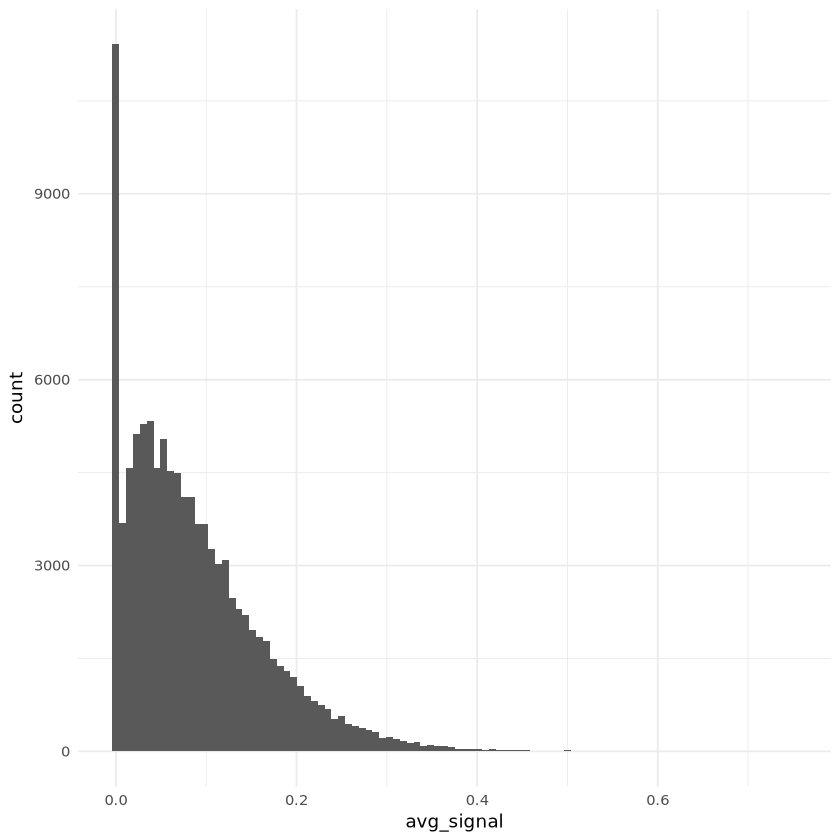

In [3]:
modC_0day_region<- modC_0day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "0day")
modC_4day_region<- modC_4day %>% group_by(peakID, cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "4day")
modC_8day_region<- modC_8day %>% group_by(peakID,cluster) %>% summarise(reg_mCA= mean(p_mCA), reg_hmCA = mean(p_hmCA), reg_unmodCA = mean(p_unmodCA), reg_mCB= mean(p_mCB), reg_hmCB = mean(p_hmCB), reg_unmodCB = mean(p_unmodCB)) %>% mutate(reg_avg_mC = (reg_mCA+reg_mCB)/2, reg_avg_hmC = (reg_hmCA+reg_hmCB)/2, reg_avg_unmodC = (reg_unmodCA+reg_unmodCB)/2, time = "8day")

modC_cluster<- rbind(modC_0day_region, modC_4day_region, modC_8day_region)
hmC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_hmC)
mC_cluster<- pivot_wider(modC_cluster, id_cols = c(peakID, cluster), names_from = time, values_from = reg_avg_mC)

allmod_cluster<- pivot_longer(modC_cluster, names_to = "mod", values_to = "avg_signal", cols = c(reg_avg_mC, reg_avg_hmC, reg_avg_unmodC))

hmC_histogram<- ggplot(filter(allmod_cluster, mod == "reg_avg_hmC" & cluster != "static"), aes(x= avg_signal))+
  geom_histogram(bins = 100)+
  theme_minimal()
hmC_histogram

ggsave(hmC_histogram, filename= "/data/hodges_lab/6L_seq/figures/hmC_histogram_dynamicreg_avg.pdf", units = "in", width = 4, height = 4)

## Plot Figure 3E, Figure 5D, Figure 5C & stats

`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.


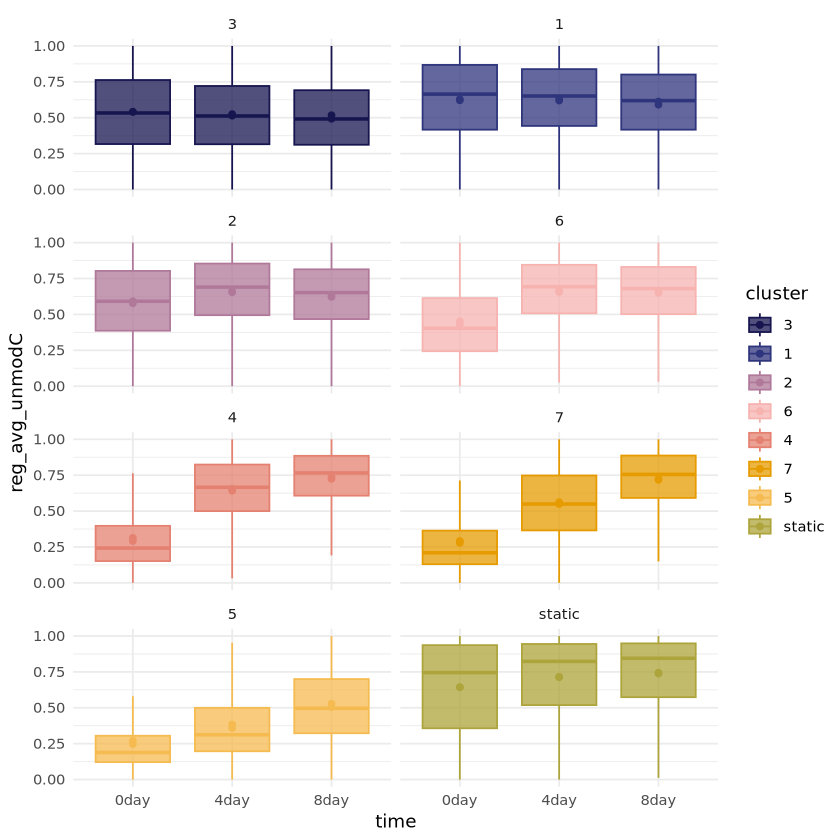

`summarise()` has grouped output by 'cluster'. You can override using the
`.groups` argument.
Warning message:
“Removed 233 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


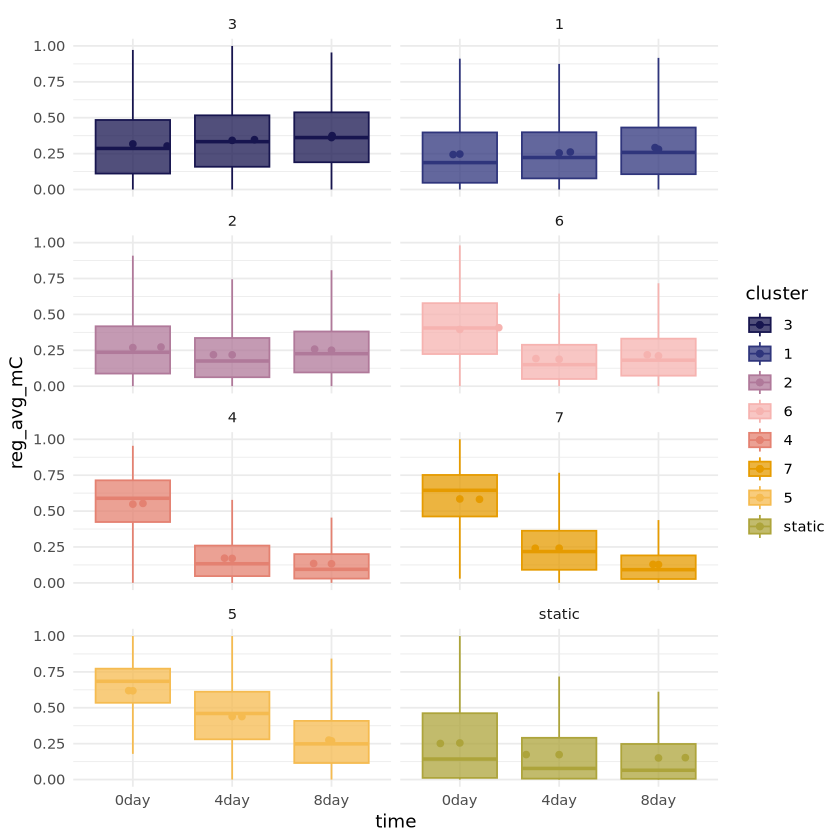

Warning message:
“Removed 233 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 233 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


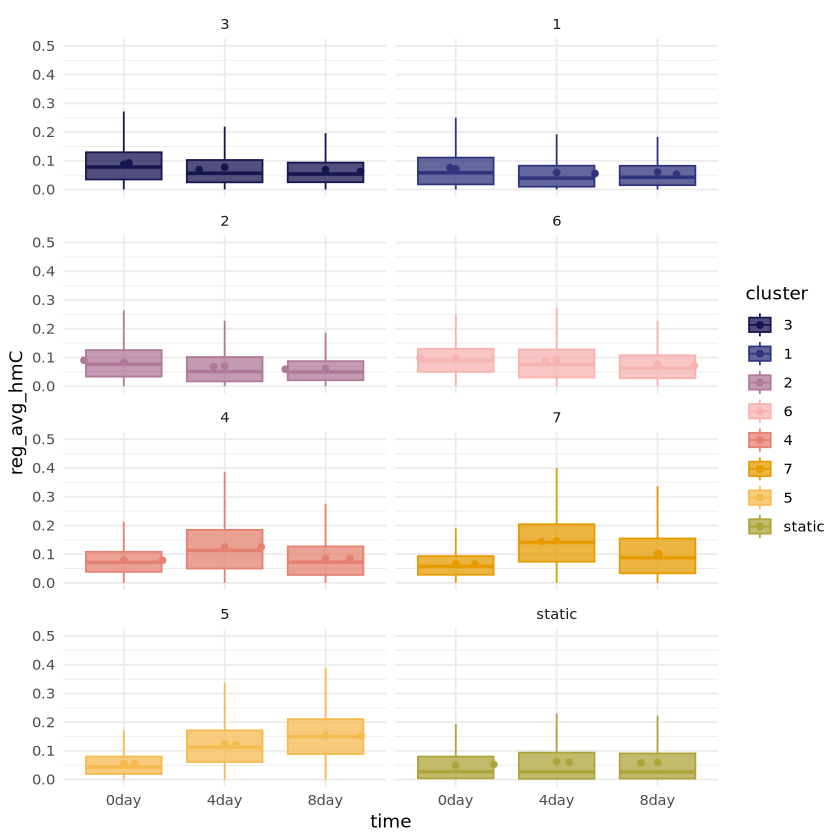

Warning message:
“Removed 233 rows containing non-finite outside the scale range
(`stat_boxplot()`).”



	Wilcoxon rank sum test with continuity correction

data:  reg_avg_hmC by time
W = 4251905227, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  reg_avg_hmC by time
W = 4495568741, p-value = 9.108e-08
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  reg_avg_hmC by time
W = 4367326210, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


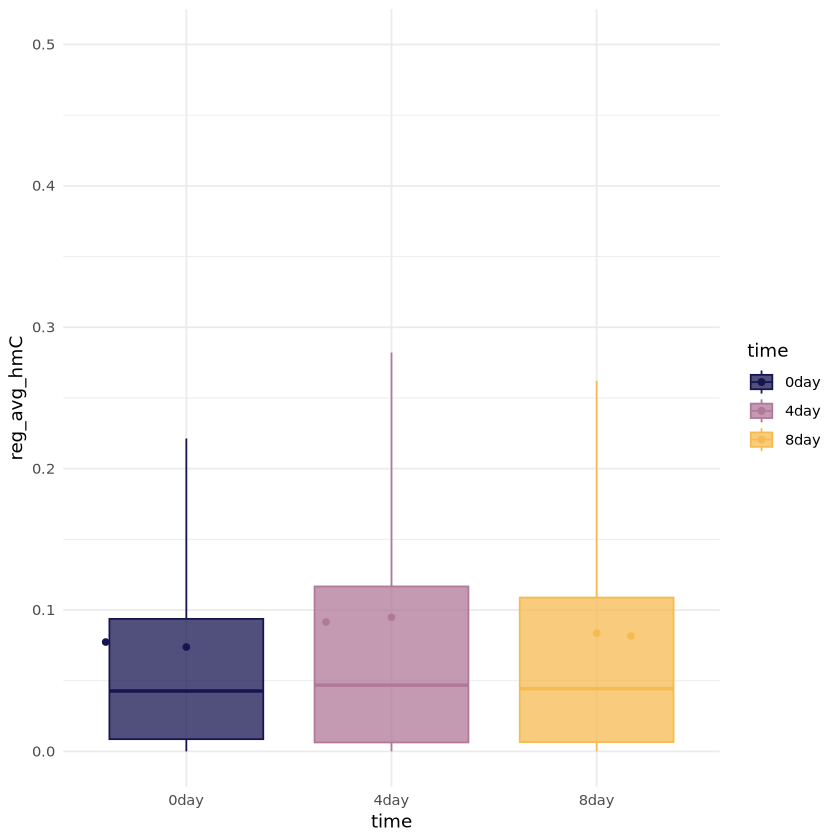

In [7]:
modC_cluster$cluster<- factor(modC_cluster$cluster, levels = c(3,1,2,6,4,7,5, "static"))
allmod_cluster$cluster<- factor(allmod_cluster$cluster, levels = c(3,1,2,6,4,7,5, "static"))
allmod_cluster$mod<- factor(allmod_cluster$mod, levels = c("reg_avg_unmodC", "reg_avg_mC", "reg_avg_hmC"))

modC_cluster_unmodCsum<- group_by(modC_cluster, cluster, time) %>%summarise(unmodCA = mean(reg_unmodCA), unmodCB = mean(reg_unmodCB))
unmodC_boxplot<- ggplot()+
  geom_boxplot(data= modC_cluster, aes(x= time, y= reg_avg_unmodC, fill = cluster, color = cluster), outlier.shape = NA, alpha = 0.75)+
  geom_point(data = modC_cluster_unmodCsum, aes(x= time, y= unmodCA, fill = cluster, color = cluster))+
  geom_point(data = modC_cluster_unmodCsum, aes(x= time, y= unmodCB, fill = cluster, color = cluster))+
  ylim(0, 1)+
  scale_fill_manual(values=met.brewer("Renoir", 8))+
  scale_color_manual(values=met.brewer("Renoir", 8))+
  facet_wrap(~cluster, ncol = 2)+
  theme_minimal()
unmodC_boxplot

modC_cluster_mCsum<- group_by(modC_cluster, cluster, time) %>%summarise(mCA = mean(reg_mCA), mCB = mean(reg_mCB))
mC_boxplot<- ggplot()+
  geom_boxplot(data= modC_cluster, aes(x= time, y= reg_avg_mC, fill = cluster, color = cluster), outlier.shape = NA, alpha = 0.75)+
  geom_point(data = modC_cluster_mCsum, position = "jitter", aes(x= time, y= mCA, fill = cluster, color = cluster))+
  geom_point(data = modC_cluster_mCsum, aes(x= time, y= mCB, fill = cluster, color = cluster))+
  ylim(0, 1)+
  scale_fill_manual(values=met.brewer("Renoir", 8))+
  scale_color_manual(values=met.brewer("Renoir", 8))+
  facet_wrap(~cluster, ncol = 2)+
  theme_minimal()
mC_boxplot
ggsave(mC_boxplot, filename= "/data/hodges_lab/6L_seq/figures/bycluster_mC_time_6L.pdf", units = "in", width = 10, height = 3.5)

modC_cluster_hmCsum<- group_by(modC_cluster, cluster, time) %>%summarise(hmCA = mean(reg_hmCA), hmCB = mean(reg_hmCB))
hmC_boxplot<- ggplot()+
  geom_boxplot(data= modC_cluster, aes(x= time, y= reg_avg_hmC, fill = cluster, color = cluster), outlier.shape = NA, alpha = 0.75)+
  geom_point(data = modC_cluster_hmCsum, position = "jitter", aes(x= time, y= hmCA, fill = cluster, color = cluster))+
  geom_point(data = modC_cluster_hmCsum, aes(x= time, y= hmCB, fill = cluster, color = cluster))+
  ylim(0, 0.5)+
  scale_fill_manual(values=met.brewer("Renoir", 8))+
  scale_color_manual(values=met.brewer("Renoir", 8))+
  facet_wrap(~cluster, ncol = 2)+
  theme_minimal()
hmC_boxplot
ggsave(hmC_boxplot, filename= "/data/hodges_lab/6L_seq/figures/bycluster_hmC_time_6L.pdf", units = "in", width = 3, height = 5)

total_hmC_boxplot<- ggplot()+
  geom_boxplot(data = modC_cluster, aes(x= time, y= reg_avg_hmC, fill = time, color = time),outlier.shape = NA, alpha = 0.75)+
  geom_point(data= total_hmCsum, position = "jitter", aes(x= time, y= t_hmCA, fill = time, color = time))+
  geom_point(data= total_hmCsum, aes(x= time, y= t_hmCB, fill = time, color = time))+
  ylim(0,0.5)+
  scale_fill_manual(values=met.brewer("Renoir", 3))+
  scale_color_manual(values=met.brewer("Renoir", 3))+
  theme_minimal()
total_hmC_boxplot
ggsave(total_hmC_boxplot, filename= "/data/hodges_lab/6L_seq/figures/total_hmC_time_6L.pdf", units = "in", width = 3, height = 5)

##stats for figure 5C where we show the accessible 5hmC signal 
stat_t8<-(filter(modC_cluster, time != "8day"))
stat_t0<-(filter(modC_cluster, time != "0day"))
stat_t4<-(filter(modC_cluster, time != "4day"))
t.test8 <- wilcox.test(reg_avg_hmC ~ time, data = stat_t8)
t.test8
t.test0 <- wilcox.test(reg_avg_hmC ~ time, data = stat_t0)
t.test0
t.test4 <- wilcox.test(reg_avg_hmC ~ time, data = stat_t4)
t.test4